In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from scipy import stats

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')


ModuleNotFoundError: No module named 'pandas'

In [2]:
train = pd.read_csv("Walmart_sales.csv")
train.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


## 1. Data Exploration and Cleaning

#### Displaying information about the data sets

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
train.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
train.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [1]:
train.duplicated().sum()

NameError: name 'train' is not defined

In [3]:
df=train.copy()

## Feature Engineering

In [3]:
converted_dates=pd.to_datetime(train['Date'],format="%d-%m-%Y")
train['weekday'] = converted_dates.dt.weekday
train['month'] = converted_dates.dt.month
train['month_name']=converted_dates.dt.month_name()
train['year'] = converted_dates.dt.year
train.drop(['Date'], axis=1, inplace=True)#,'month'

target = 'Weekly_Sales'
features = [i for i in train.columns if i not in [target]]
original_train = train.copy(deep=True)

train.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,month_name,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,February,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,February,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,March,2010


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int32  
 8   month         6435 non-null   int32  
 9   month_name    6435 non-null   object 
 10  year          6435 non-null   int32  
dtypes: float64(5), int32(3), int64(2), object(1)
memory usage: 477.7+ KB


In [9]:
train.nunique().sort_values()

weekday            1
Holiday_Flag       2
year               3
month             12
month_name        12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [10]:
display(train.describe())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,4.0,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.0,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,4.0,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.0,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.0,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.0,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,4.0,12.000000,2012.000000


In [11]:
nu = train[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(train[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 4 numerical & 6 categorical features.


## 2. Exploratory Data Analysis

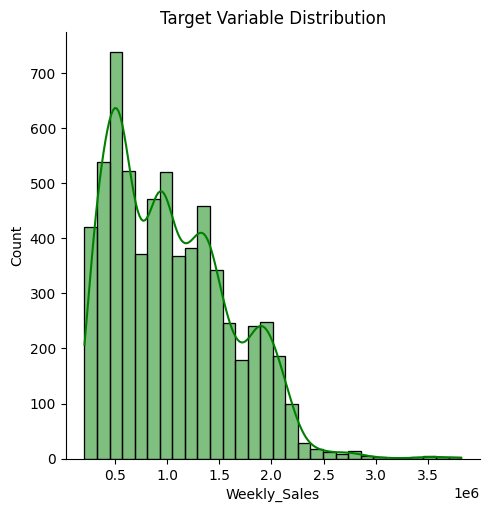

In [4]:
sns.displot(train[target], bins=30,kde=True, color='g')

plt.title('Target Variable Distribution')
plt.show()

In [13]:
holiday_counts = train['Holiday_Flag'].value_counts()
holiday_counts

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

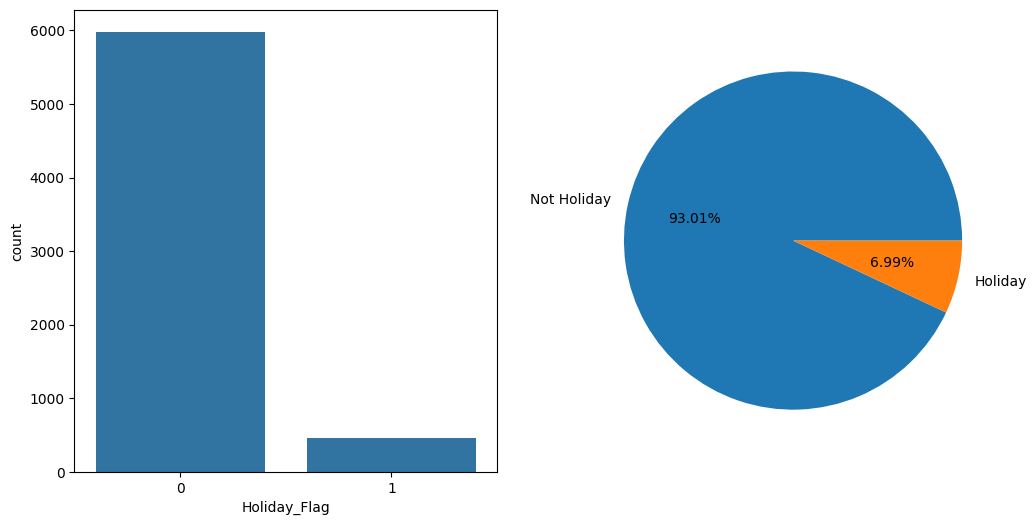

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.countplot(data = train, x = 'Holiday_Flag', ax=ax[0])

ax[1].pie(train['Holiday_Flag'].value_counts().values,
         labels = ['Not Holiday', 'Holiday'], autopct = '%1.2f%%')
plt.show()

In [7]:
#Super bowl dates in train set
train.loc[(train['Date'] == '12-02-2010')|(train['Date'] == '11-02-2011')|(train['Date'] == '10-02-2012'),'Super_Bowl'] = 1
train.loc[(train['Date'] != '12-02-2010')&(train['Date'] != '11-02-2011')&(train['Date'] != '10-02-2012'),'Super_Bowl'] = 0
#Labour day dates in train set
train.loc[(train['Date'] == '10-09-2010')|(train['Date'] == '09-09-2011')|(train['Date'] == '07-09-2012'),'Labor_Day'] = 1
train.loc[(train['Date'] != '10-09-2010')&(train['Date'] != '09-09-2011')&(train['Date'] != '07-09-2012'),'Labor_Day'] = 0
# Thanksgiving dates in train set
train.loc[(train['Date'] == '26-11-2010')|(train['Date'] == '25-11-2011'),'Thanksgiving'] = 1
train.loc[(train['Date'] != '26-11-2010')&(train['Date'] != '25-11-2011'),'Thanksgiving'] = 0
#Christmas dates in train set
train.loc[(train['Date'] == '31-12-2010')|(train['Date'] == '30-12-2011'),'Christmas'] = 1
train.loc[(train['Date'] != '31-12-2010')&(train['Date'] != '30-12-2011'),'Christmas'] = 0

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

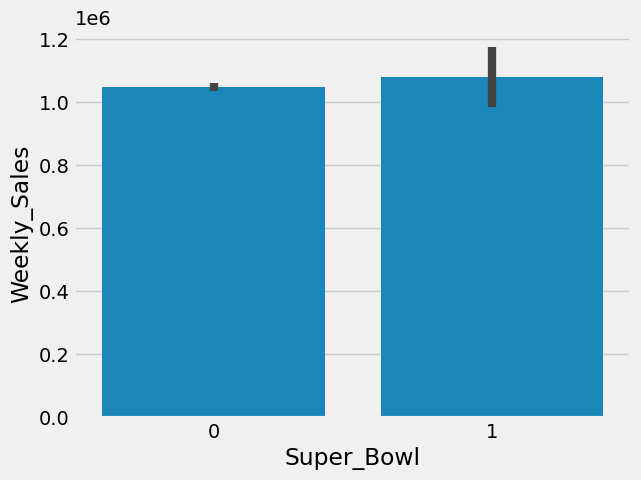

In [47]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=train)

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

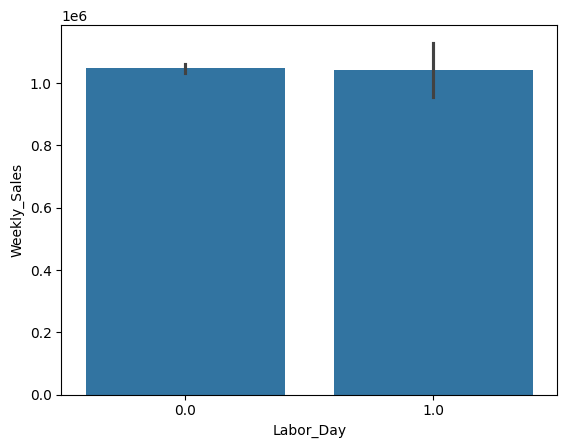

In [8]:
sns.barplot(x='Labor_Day',y='Weekly_Sales',data=train)

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

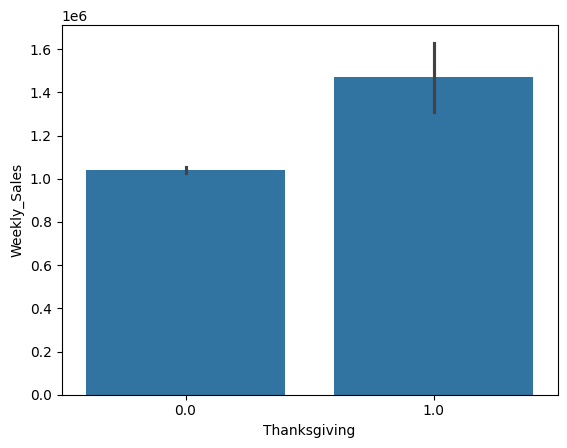

In [9]:
sns.barplot(x='Thanksgiving',y='Weekly_Sales',data=train)

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

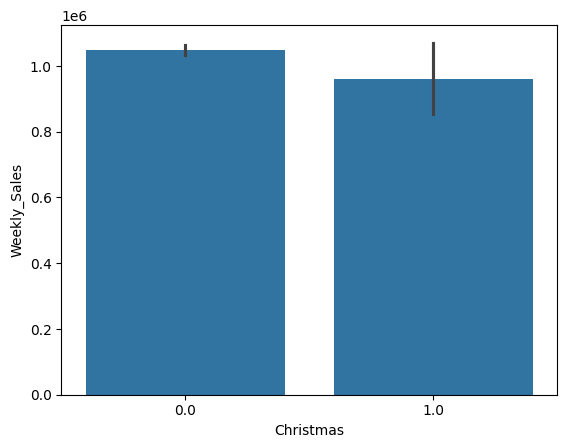

In [11]:
sns.barplot(x='Christmas',y='Weekly_Sales',data=train)

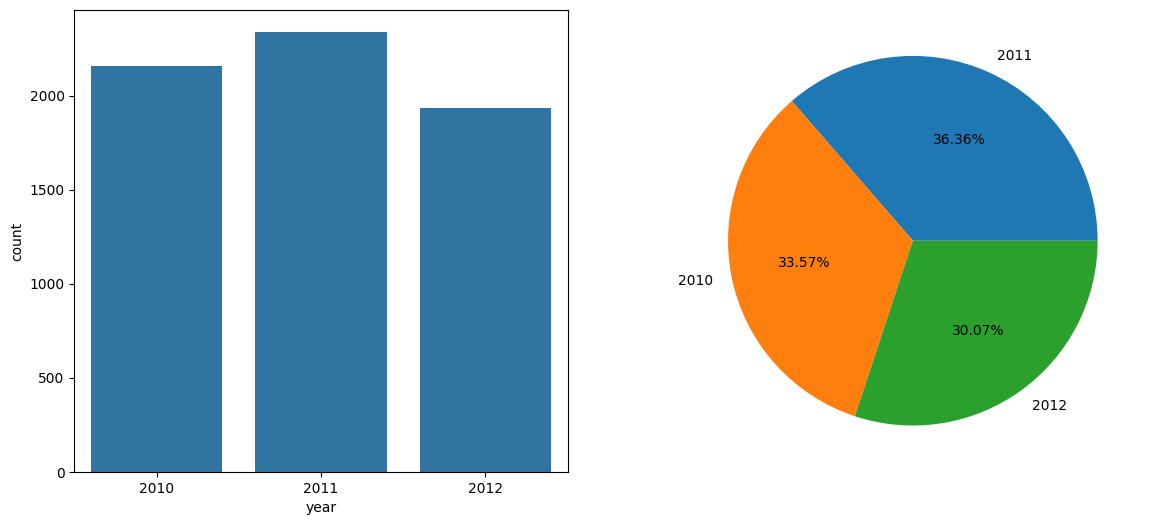

In [15]:
year_counts = train['year'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data = train, x = 'year', ax=ax[0])

ax[1].pie(train['year'].value_counts().values,
         labels = train['year'].value_counts().index, 
         autopct = '%1.2f%%')
plt.show()

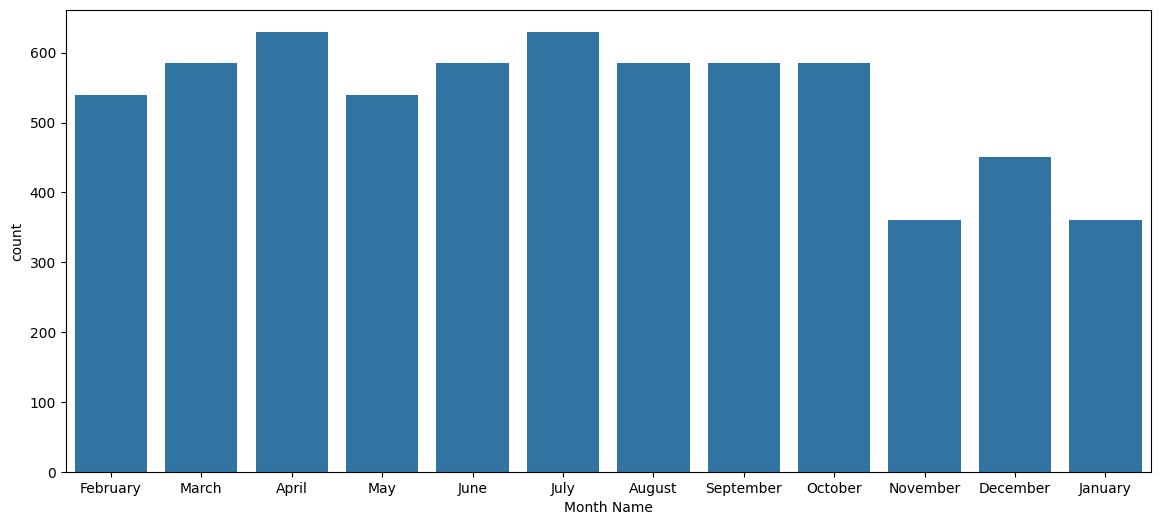

In [16]:
month_name_counts = train['month_name'].value_counts()
plt.figure(figsize = (14, 6))
sns.countplot(data = train, x = 'month_name')
plt.xlabel('Month Name')
plt.show()

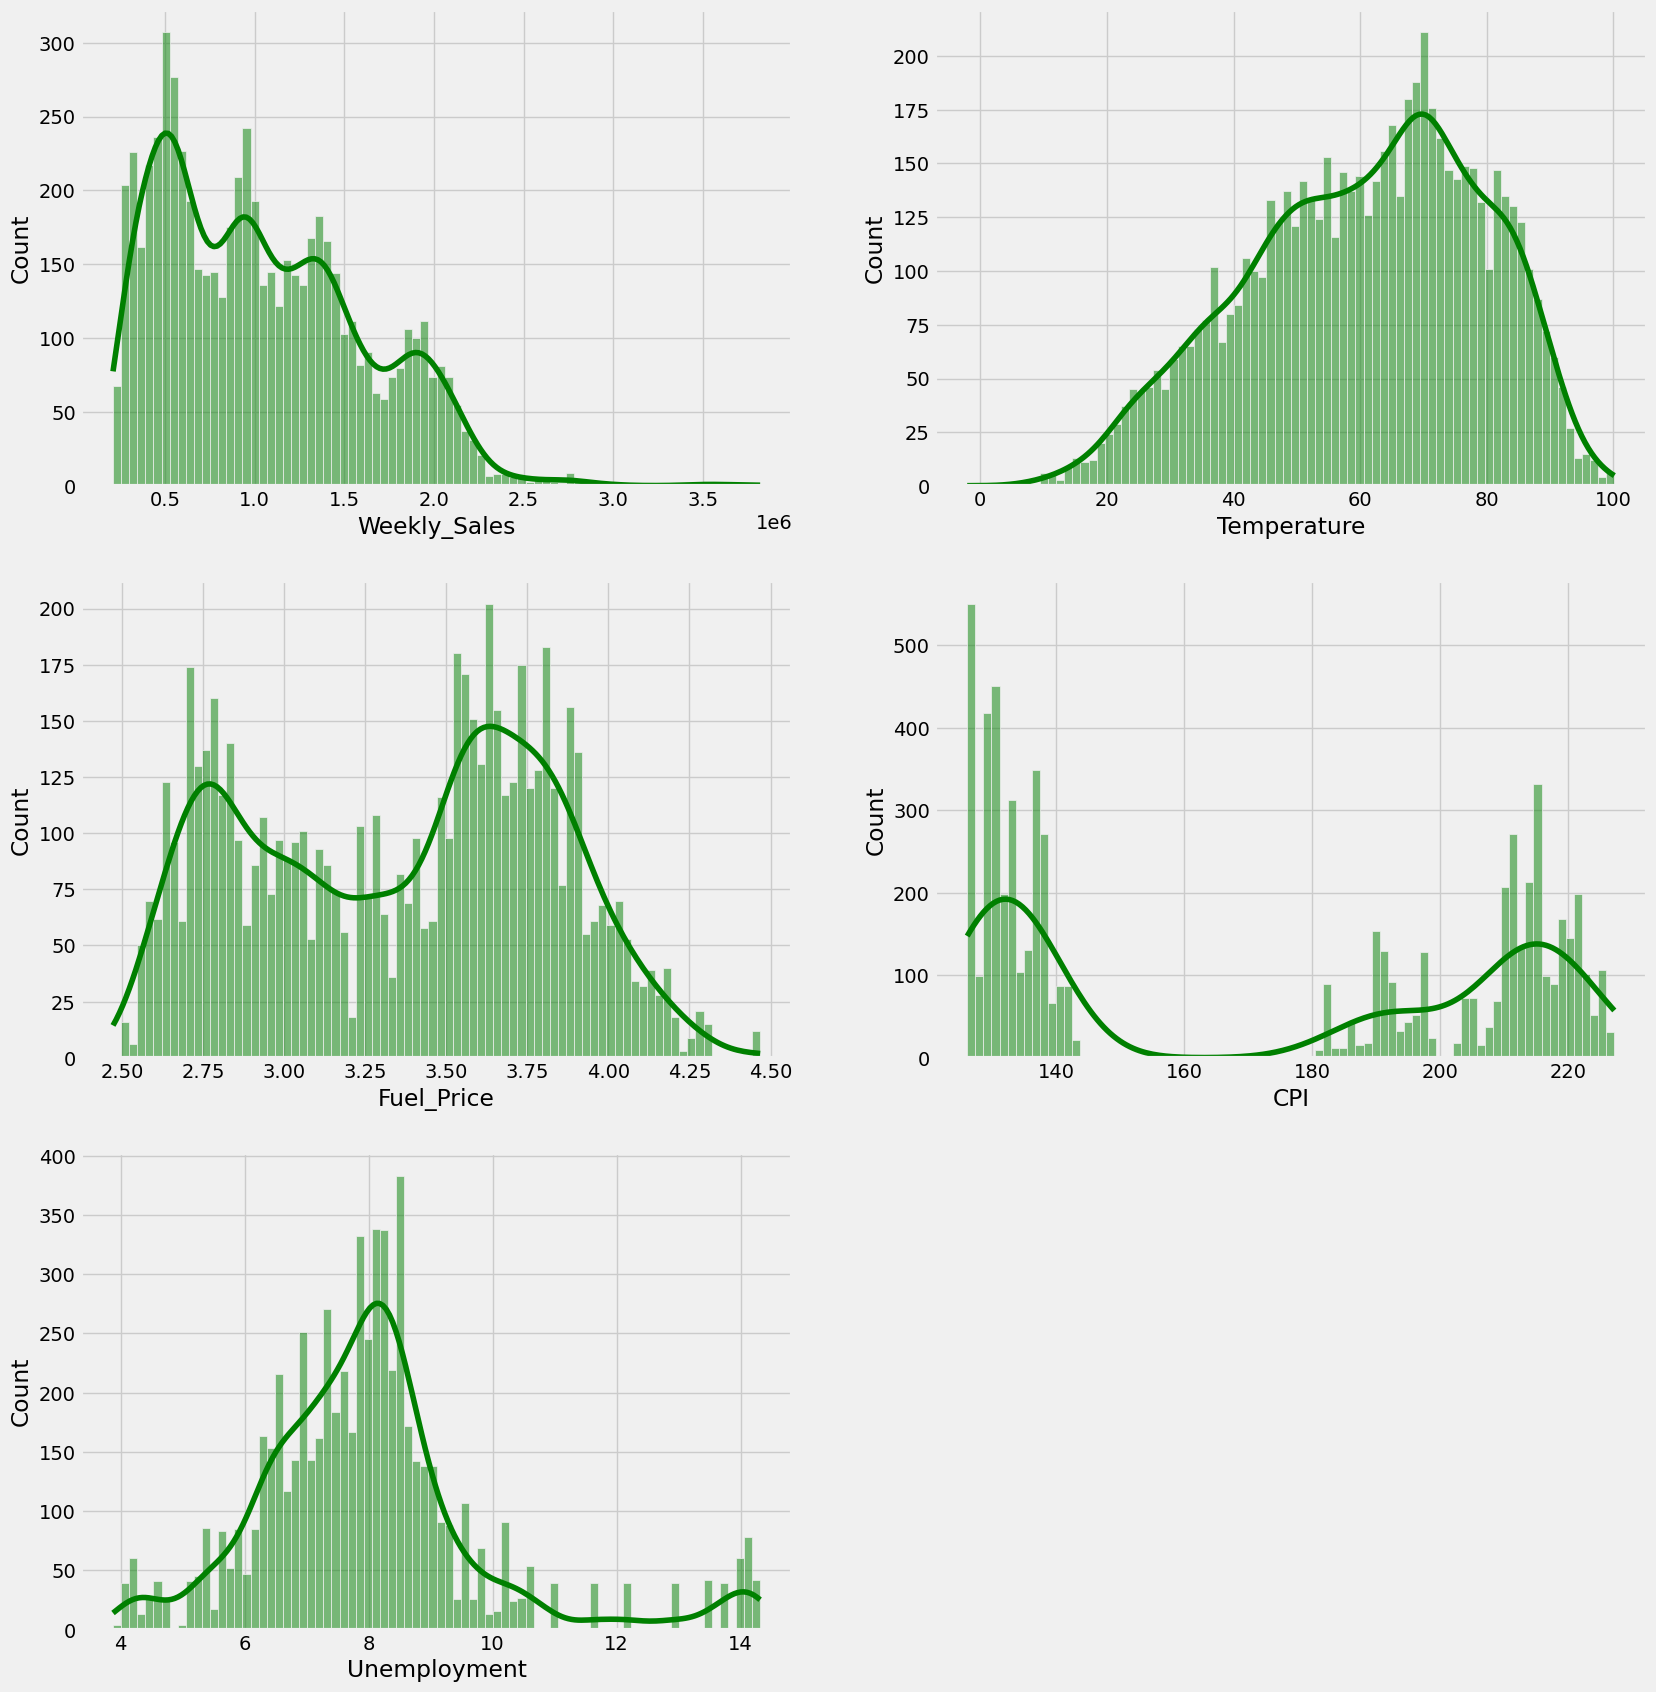

In [17]:
plt.style.use("fivethirtyeight")

columns = ['Weekly_Sales','Temperature','Fuel_Price', 'CPI', 'Unemployment']
plt.figure(figsize = (18, 20))
for i, col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data = train, x = col, kde = True, bins = round(np.sqrt(len(train))), color = 'green') # Applied Square Root Rule for bins count
plt.show()

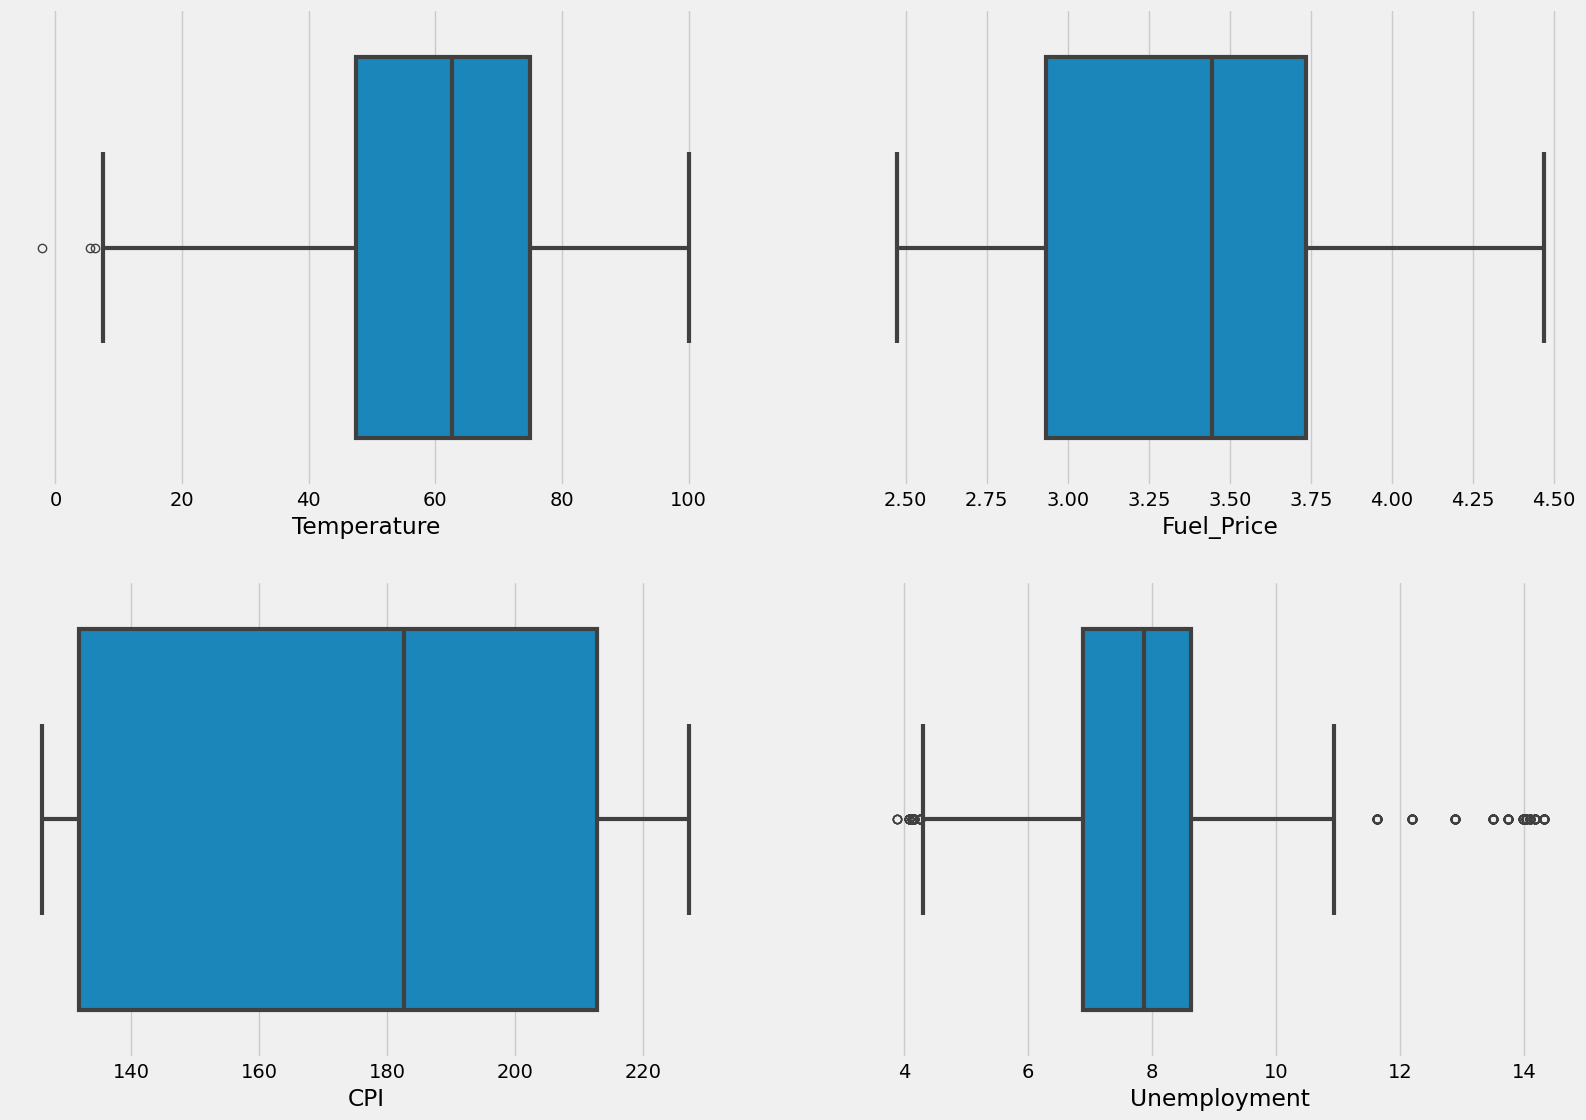

In [18]:
columns = ['Temperature','Fuel_Price', 'CPI', 'Unemployment']
plt.figure(figsize = (18, 20))
for i, col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data = train, x = col,linewidth=3)
plt.show()

In [19]:
train.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

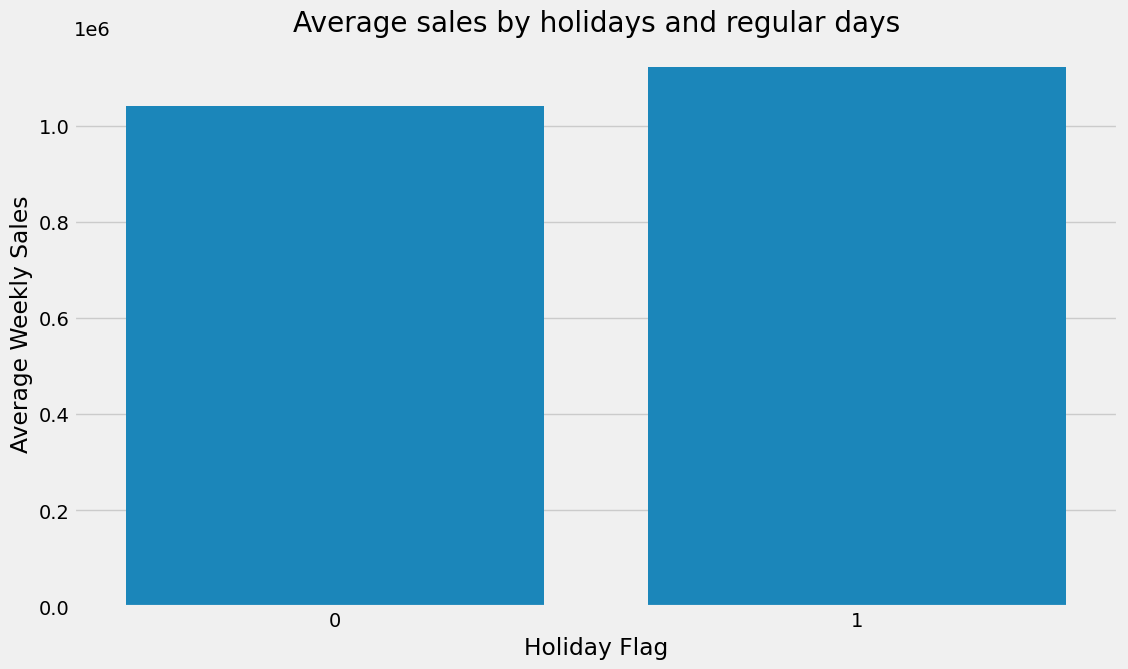

In [20]:
plt.figure(figsize = (12, 7))
sns.barplot(data = train,
           x = 'Holiday_Flag',
           y = 'Weekly_Sales',
           estimator = np.mean,
           errorbar=('ci',False))

plt.title('Average sales by holidays and regular days')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales')
plt.show()

In [21]:
train.groupby('Holiday_Flag')['Weekly_Sales'].sum()

Holiday_Flag
0    6.231919e+09
1    5.052996e+08
Name: Weekly_Sales, dtype: float64

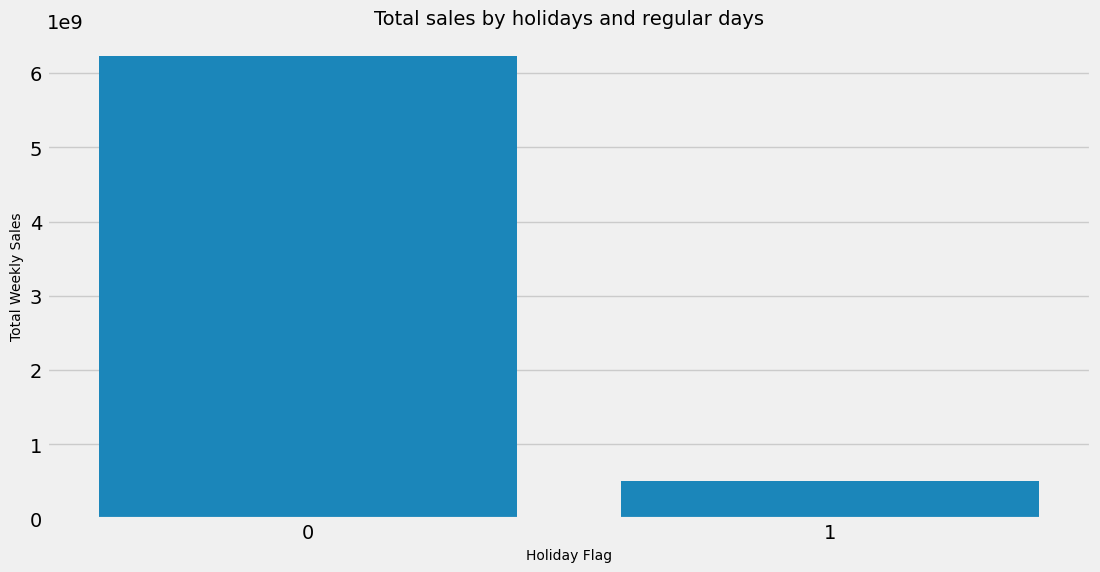

In [22]:
plt.figure(figsize = (12, 6))
sns.barplot(data = train,
           x = 'Holiday_Flag',
           y = 'Weekly_Sales',
           estimator = np.sum,
           errorbar=('ci',False))

plt.title('Total sales by holidays and regular days', size = 14)
plt.xlabel('Holiday Flag', size = 10)
plt.ylabel('Total Weekly Sales', size = 10)
plt.show()

In [23]:
best_branch =  train.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False)
best_branch

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

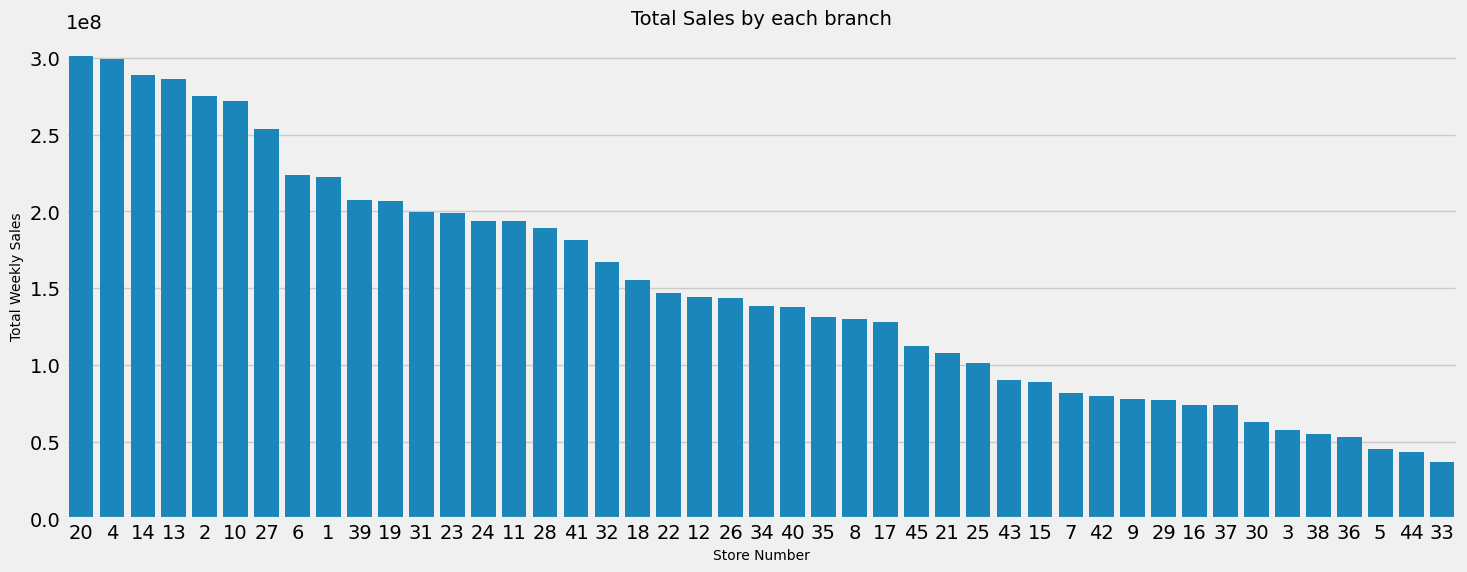

In [24]:
plt.figure(figsize = (16, 6))
sns.barplot(data = train,
           x = 'Store',
           y = 'Weekly_Sales',
           order = best_branch.index,
           estimator = np.sum,
           errorbar=('ci',False))

plt.title('Total Sales by each branch', size = 14)
plt.xlabel('Store Number', size = 10)
plt.ylabel('Total Weekly Sales', size = 10)
plt.show()

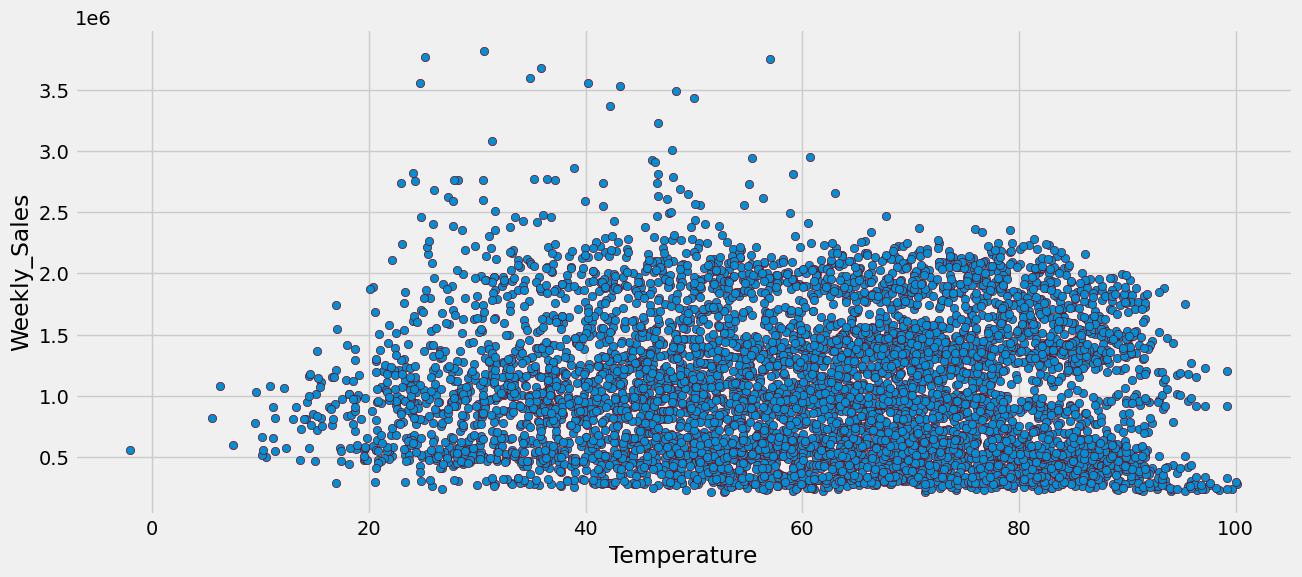

In [25]:
plt.figure(figsize = (14, 6))

sns.scatterplot(data = train,
           x = 'Temperature',
           y = 'Weekly_Sales',
           edgecolor = 'maroon')
plt.show()

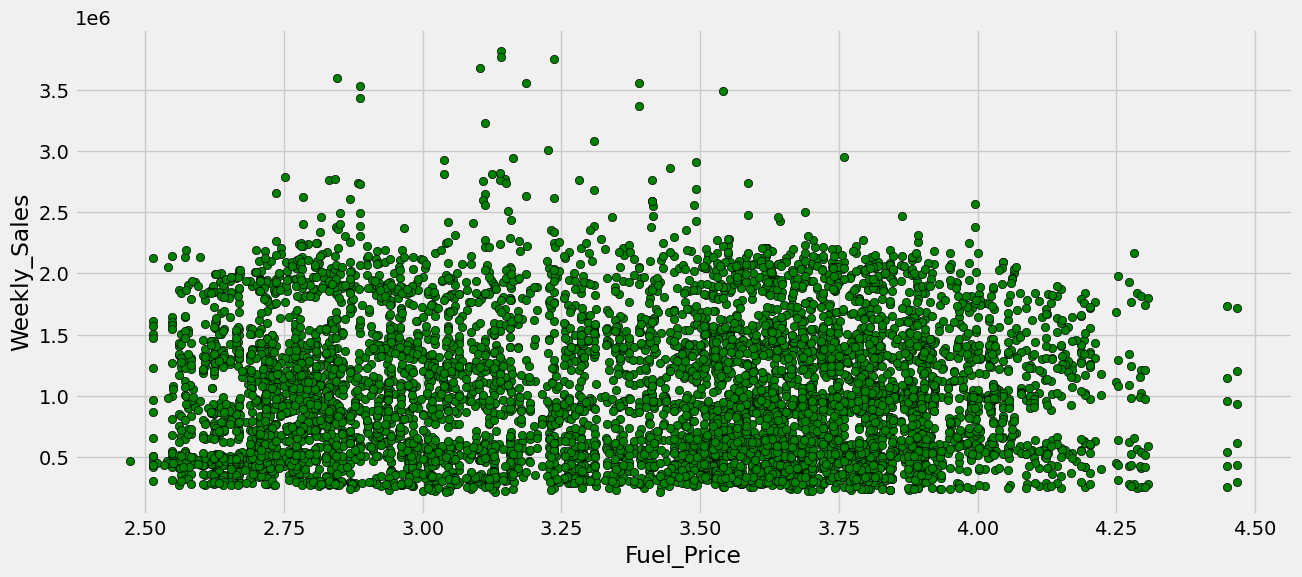

In [26]:
plt.figure(figsize = (14, 6))

sns.scatterplot(data = train,
           x = 'Fuel_Price',
           y = 'Weekly_Sales',
           color='green',
           edgecolor = 'black')
plt.show()

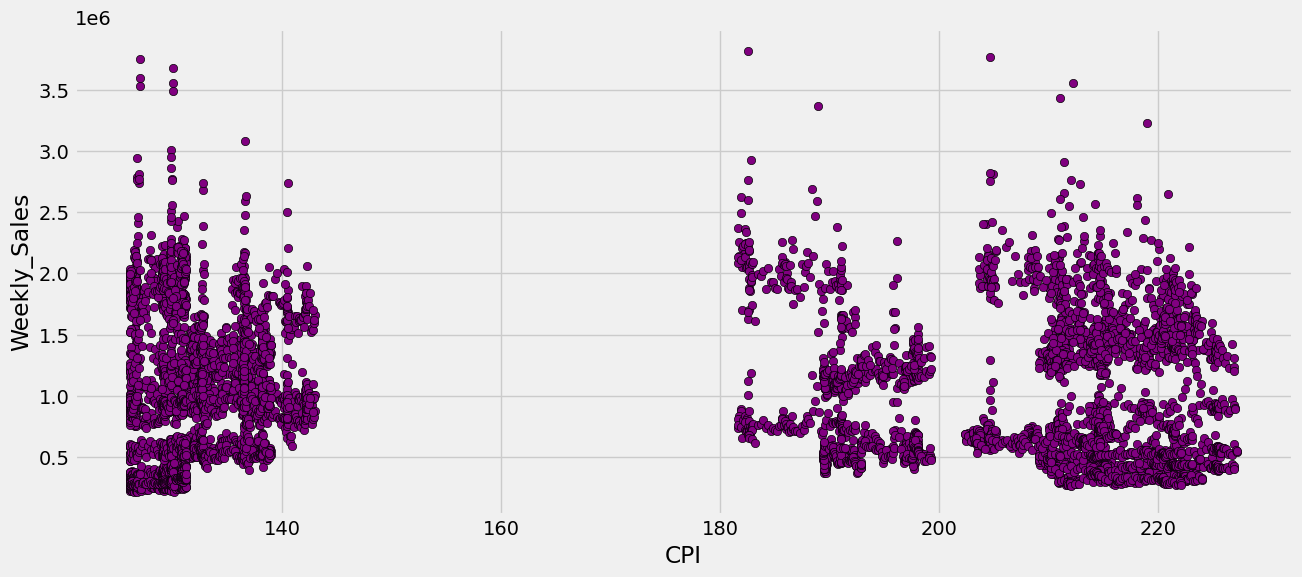

In [27]:
plt.figure(figsize = (14, 6))

sns.scatterplot(data = train,
           x = 'CPI',
           y = 'Weekly_Sales',
           color='purple',
           edgecolor = 'black')
plt.show()

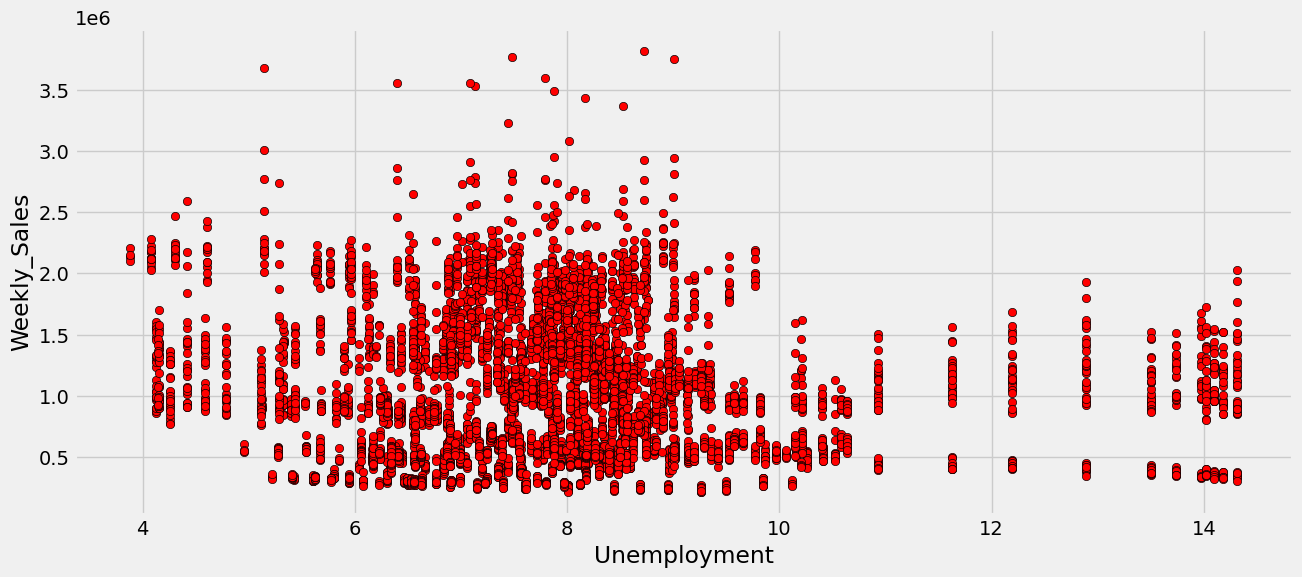

In [28]:
plt.figure(figsize = (14, 6))

sns.scatterplot(data = train,
           x = 'Unemployment',
           y = 'Weekly_Sales',
           color='red',
           edgecolor = 'black')
plt.show()

In [12]:
df=train.copy()

In [13]:
df.drop(['Date','Holiday_Flag'],axis=1,inplace=True)

In [6]:
df.corr()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.335332,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-0.335332,1.000000,-0.063810,0.009464,-0.072634,-0.106176
Temperature,-0.022659,-0.063810,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.060023,0.009464,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.209492,-0.072634,0.176888,-0.170642,1.000000,-0.302020
Unemployment,0.223531,-0.106176,0.101158,-0.034684,-0.302020,1.000000


<Axes: >

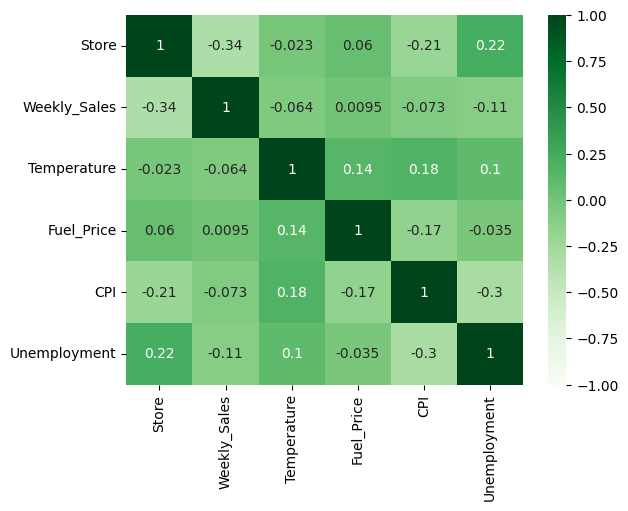

In [12]:
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,cmap="Greens")

## 3. Time Series Analysis

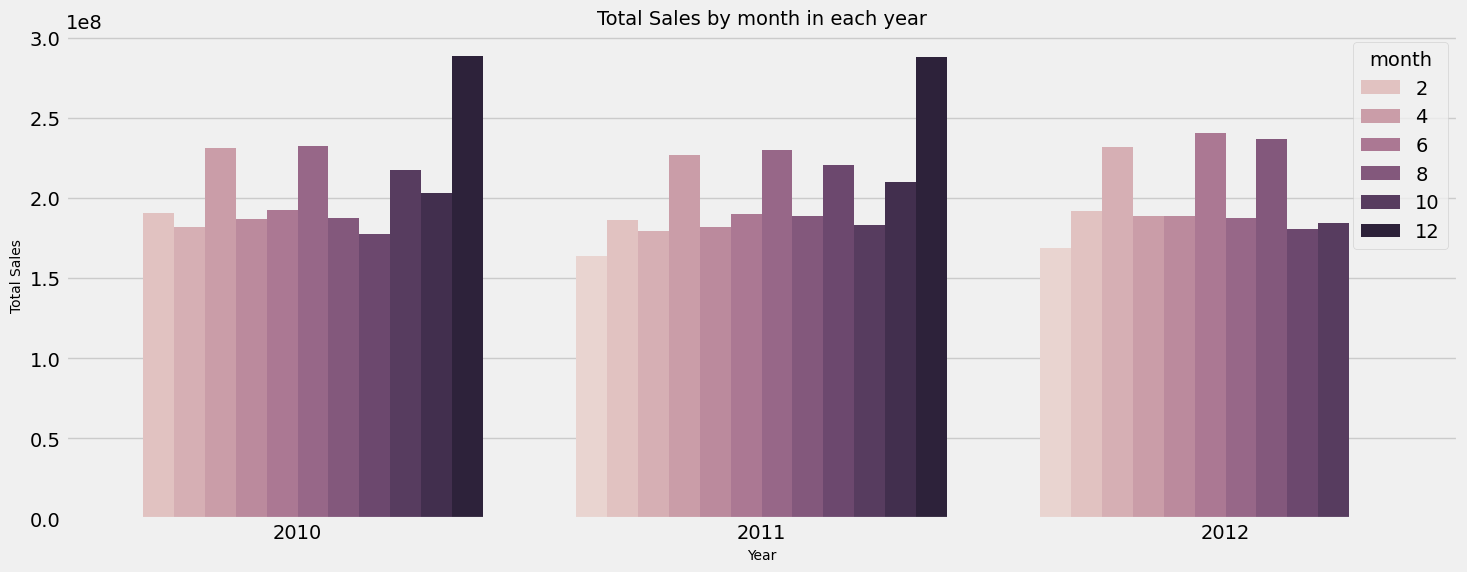

In [29]:
plt.figure(figsize = (16, 6))
sns.barplot(data = train,
           x = 'year',
           y = 'Weekly_Sales',
           hue = 'month',
           estimator = np.sum,
           errorbar=('ci',False))

plt.title('Total Sales by month in each year', size = 14)
plt.xlabel('Year', size = 10)
plt.ylabel('Total Sales', size = 10)
plt.show()

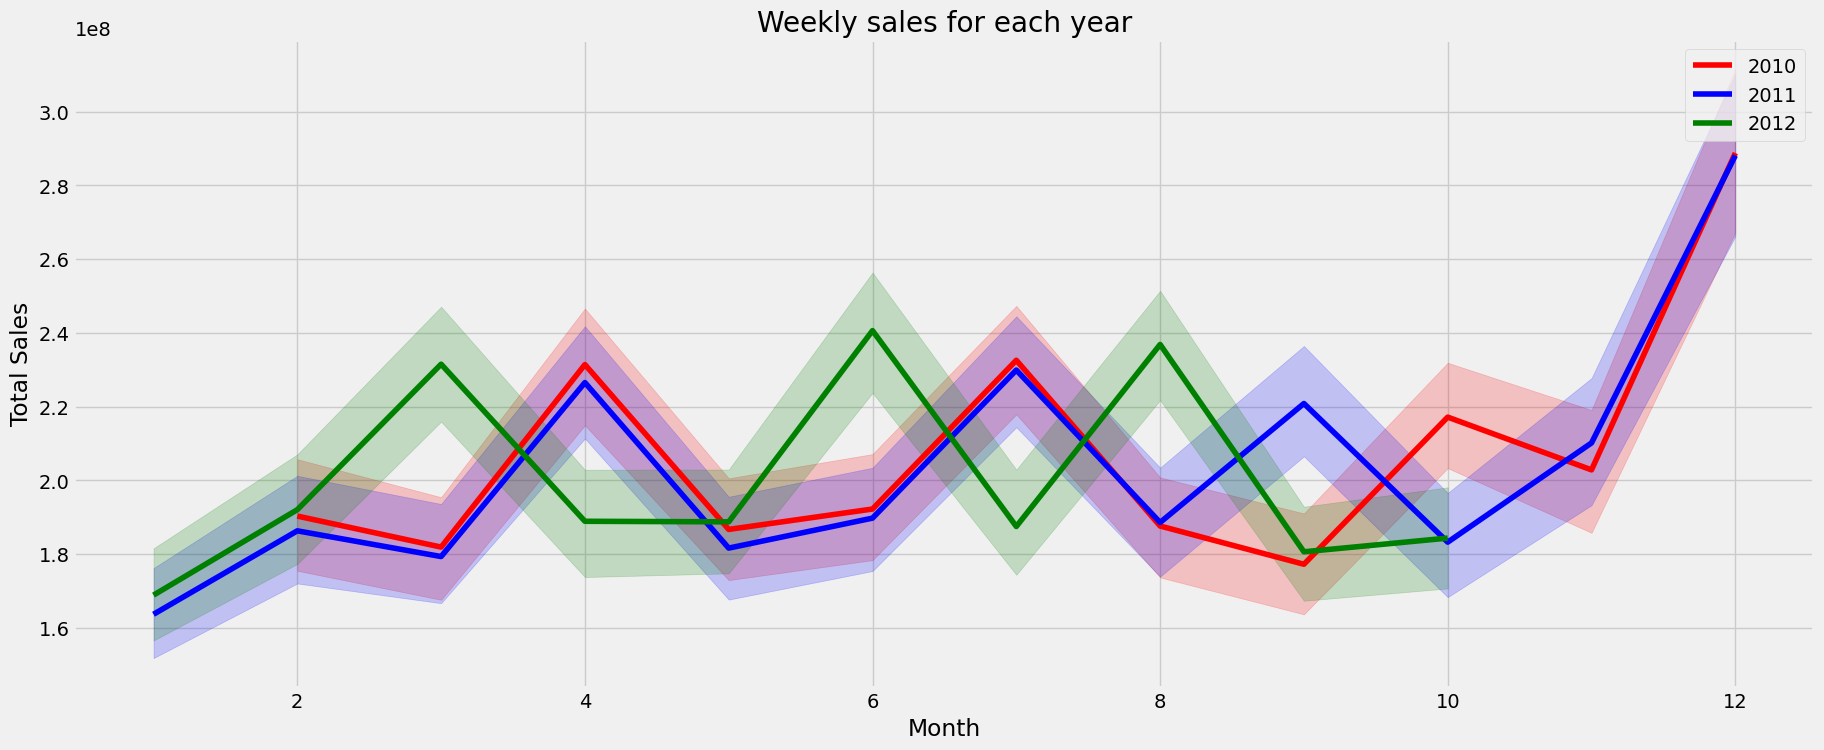

In [30]:
years = ['2010', '2011', '2012']
colors = ['red', 'blue', 'green']

plt.figure(figsize = (20, 8))
for i, year in enumerate(years):
    sns.lineplot(data = train[train['year']==int(year)], 
                x = 'month',
                y = 'Weekly_Sales',
                estimator = np.sum,
                color = colors[i],
                label = year)
plt.title('Weekly sales for each year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

## 4. Data preprocessing 

#### Fuel price vs Weekly sales


In [31]:
pearson_coef, p_value = stats.pearsonr(train['Fuel_Price'], train['Weekly_Sales'])
print(f'Pearson Coefficient is: {pearson_coef}With p-value {p_value}')

Pearson Coefficient is: 0.00946378631447513With p-value 0.44782874894858105


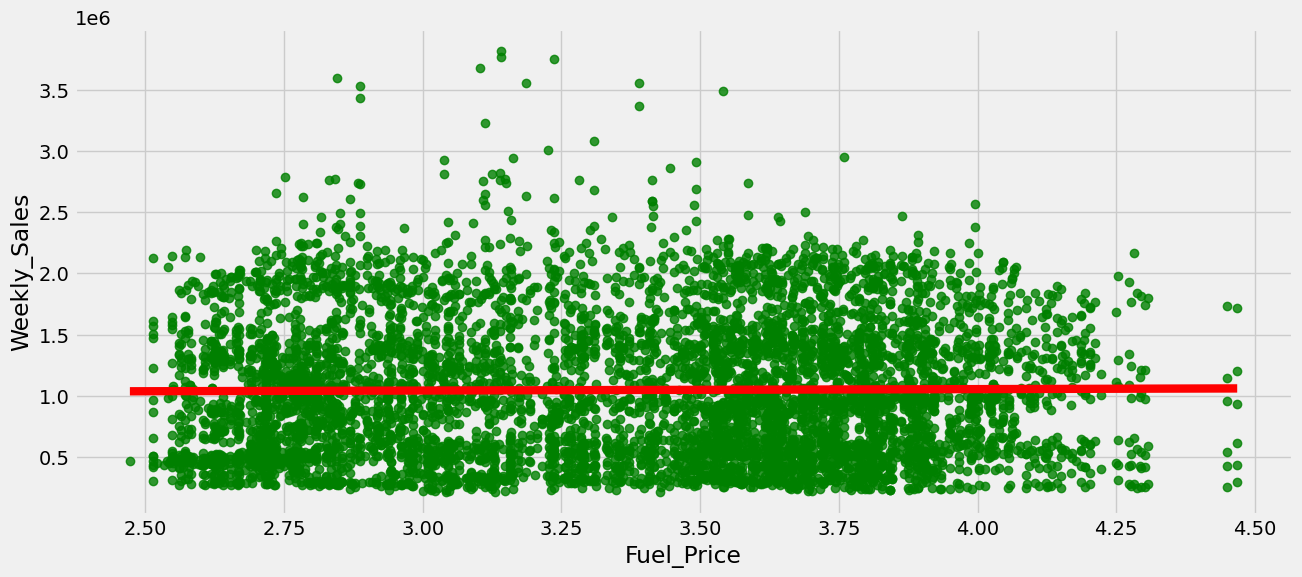

In [32]:
plt.figure(figsize = (14, 6))
sns.regplot(data = train, x = 'Fuel_Price', y = 'Weekly_Sales', color = 'Green',line_kws = {'color':'red'})
plt.show()

#### Temperature vs Weekly sales

In [33]:
pearson_coef, p_value=stats.pearsonr(train['Temperature'],train['Weekly_Sales'])
print(f"Pearson Coefficient: {pearson_coef} with P-value: {p_value}")

Pearson Coefficient: -0.06381001317946959 with P-value: 3.0076476258332254e-07


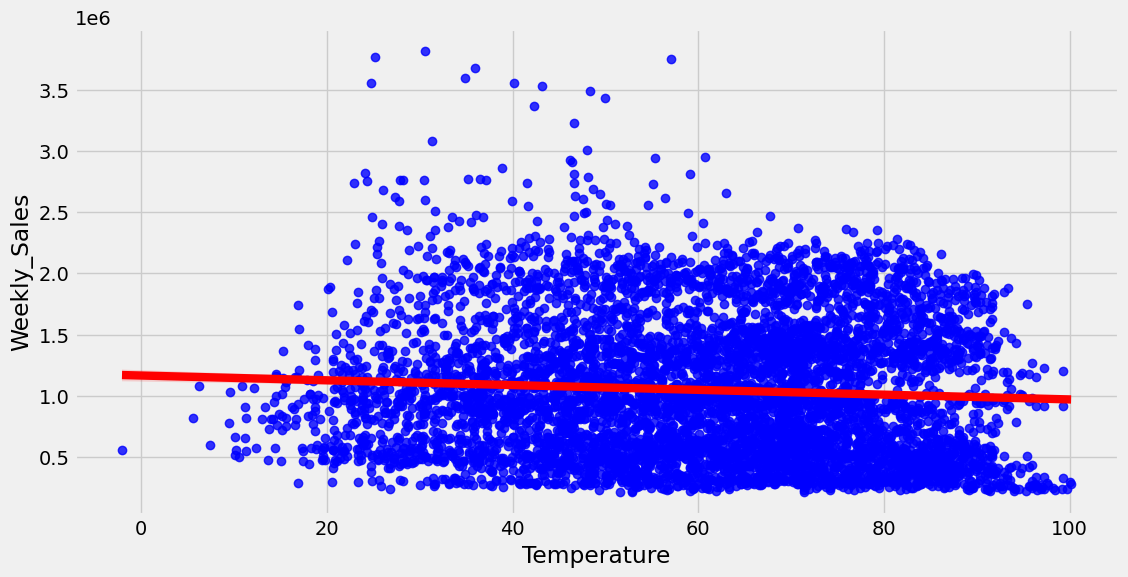

In [34]:
plt.figure(figsize=(12,6))
sns.regplot(data=train,x='Temperature',y='Weekly_Sales',color='Blue',line_kws={'color':'red'})
plt.show()

#### CPI vs Weekly sales

In [35]:
pearson_coef,p_value=stats.pearsonr(train['CPI'],train['Weekly_Sales'])
print(f'Pearson Coefficient:{pearson_coef} and p-value:{p_value}')


Pearson Coefficient:-0.07263416204017621 and p-value:5.438292612176736e-09


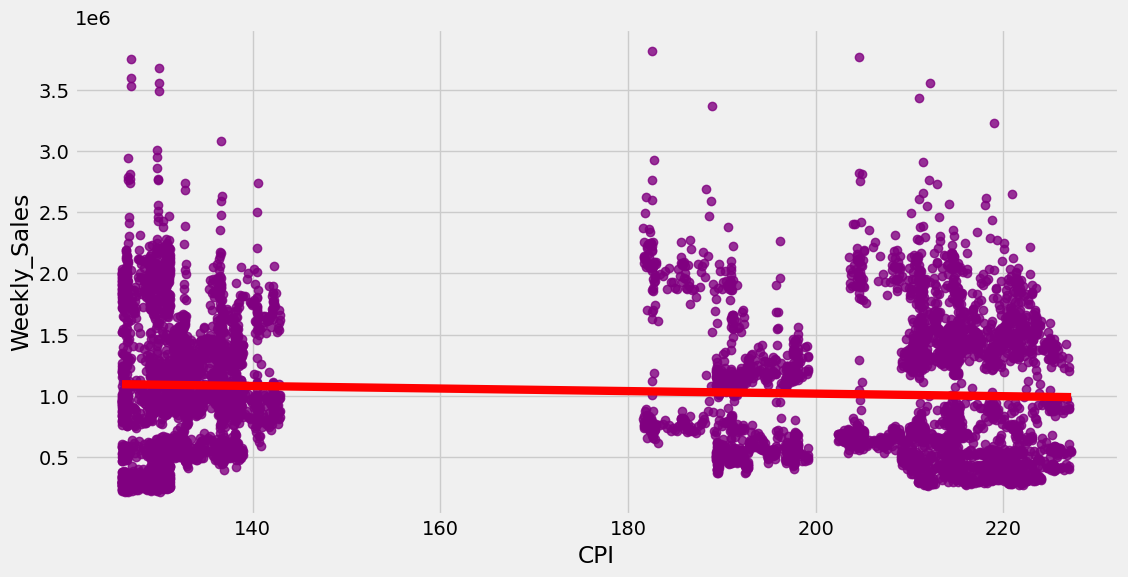

In [36]:
plt.figure(figsize=(12,6))
sns.regplot(data=train,x='CPI',y='Weekly_Sales',color='purple',line_kws={'color':'red'})
plt.show()

#### Unemployment vs Weekly sales

In [37]:
pearson_coef,p_value=stats.pearsonr(train['Unemployment'],train['Weekly_Sales'])
print(f'Pearson Coefficient:{pearson_coef} and p-value:{p_value}')

Pearson Coefficient:-0.10617608965795415 and p-value:1.3448365210234661e-17


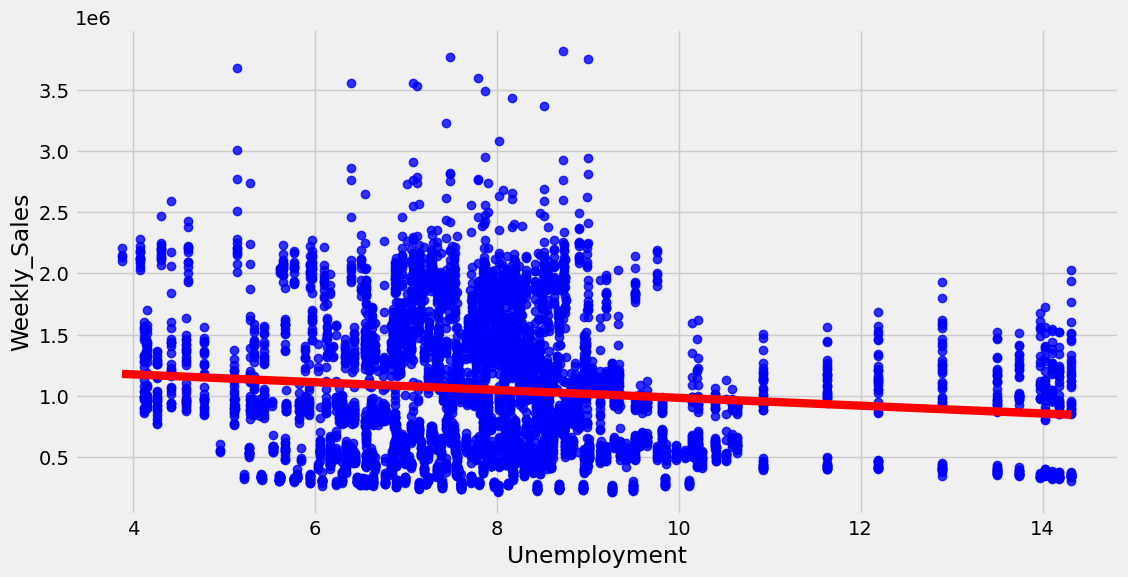

In [38]:
plt.figure(figsize=(12,6))
sns.regplot(data=train,x='Unemployment',y='Weekly_Sales',color='blue',line_kws={'color':'red'})
plt.show()

In [4]:
train.to_csv('new_walmart.csv',index=False)

In [5]:
final_data=train.copy()

In [6]:
final_data.head(10)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,month_name,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,February,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,February,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,March,2010
5,1,1439541.59,0,57.79,2.667,211.380643,8.106,4,3,March,2010
6,1,1472515.79,0,54.58,2.720,211.215635,8.106,4,3,March,2010
7,1,1404429.92,0,51.45,2.732,211.018042,8.106,4,3,March,2010
8,1,1594968.28,0,62.27,2.719,210.820450,7.808,4,4,April,2010
9,1,1545418.53,0,65.86,2.770,210.622857,7.808,4,4,April,2010


In [7]:
final_data.drop([ 'year', 'Fuel_Price'], axis = 1, inplace = True)


In [8]:
final_data['weekday'] = final_data['weekday'].astype('object')
final_data['Store'] = final_data['Store'].astype('object')
final_data['Holiday_Flag'] = final_data['Holiday_Flag'].astype('object')

In [9]:
final_data['month'] = final_data['month'].astype('object')

In [10]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   object 
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   object 
 3   Temperature   6435 non-null   float64
 4   CPI           6435 non-null   float64
 5   Unemployment  6435 non-null   float64
 6   weekday       6435 non-null   object 
 7   month         6435 non-null   object 
 8   month_name    6435 non-null   object 
dtypes: float64(4), object(5)
memory usage: 452.6+ KB


In [11]:
final_data.head(10)

,Store,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment,weekday,month,month_name
0,1,1643690.90,0,42.31,211.096358,8.106,4,2,February
1,1,1641957.44,1,38.51,211.242170,8.106,4,2,February
2,1,1611968.17,0,39.93,211.289143,8.106,4,2,February
3,1,1409727.59,0,46.63,211.319643,8.106,4,2,February
4,1,1554806.68,0,46.50,211.350143,8.106,4,3,March
5,1,1439541.59,0,57.79,211.380643,8.106,4,3,March
6,1,1472515.79,0,54.58,211.215635,8.106,4,3,March
7,1,1404429.92,0,51.45,211.018042,8.106,4,3,March
8,1,1594968.28,0,62.27,210.820450,7.808,4,4,April
9,1,1545418.53,0,65.86,210.622857,7.808,4,4,April


In [12]:

df1=final_data.copy()
#features1 = [i for i in features if i not in ['CHAS','RAD']]
numeric_columns = ['Temperature','CPI','Unemployment']

for i in numeric_columns:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(final_data.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,Store,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment,weekday,month,month_name
0,1,1643690.90,0,42.31,211.096358,8.106,4,2,February
1,1,1641957.44,1,38.51,211.242170,8.106,4,2,February
2,1,1611968.17,0,39.93,211.289143,8.106,4,2,February
3,1,1409727.59,0,46.63,211.319643,8.106,4,2,February
4,1,1554806.68,0,46.50,211.350143,8.106,4,3,March



Inference:
Before removal of outliers, The dataset had 6435 samples.
After removal of outliers, The dataset now has 5951 samples.


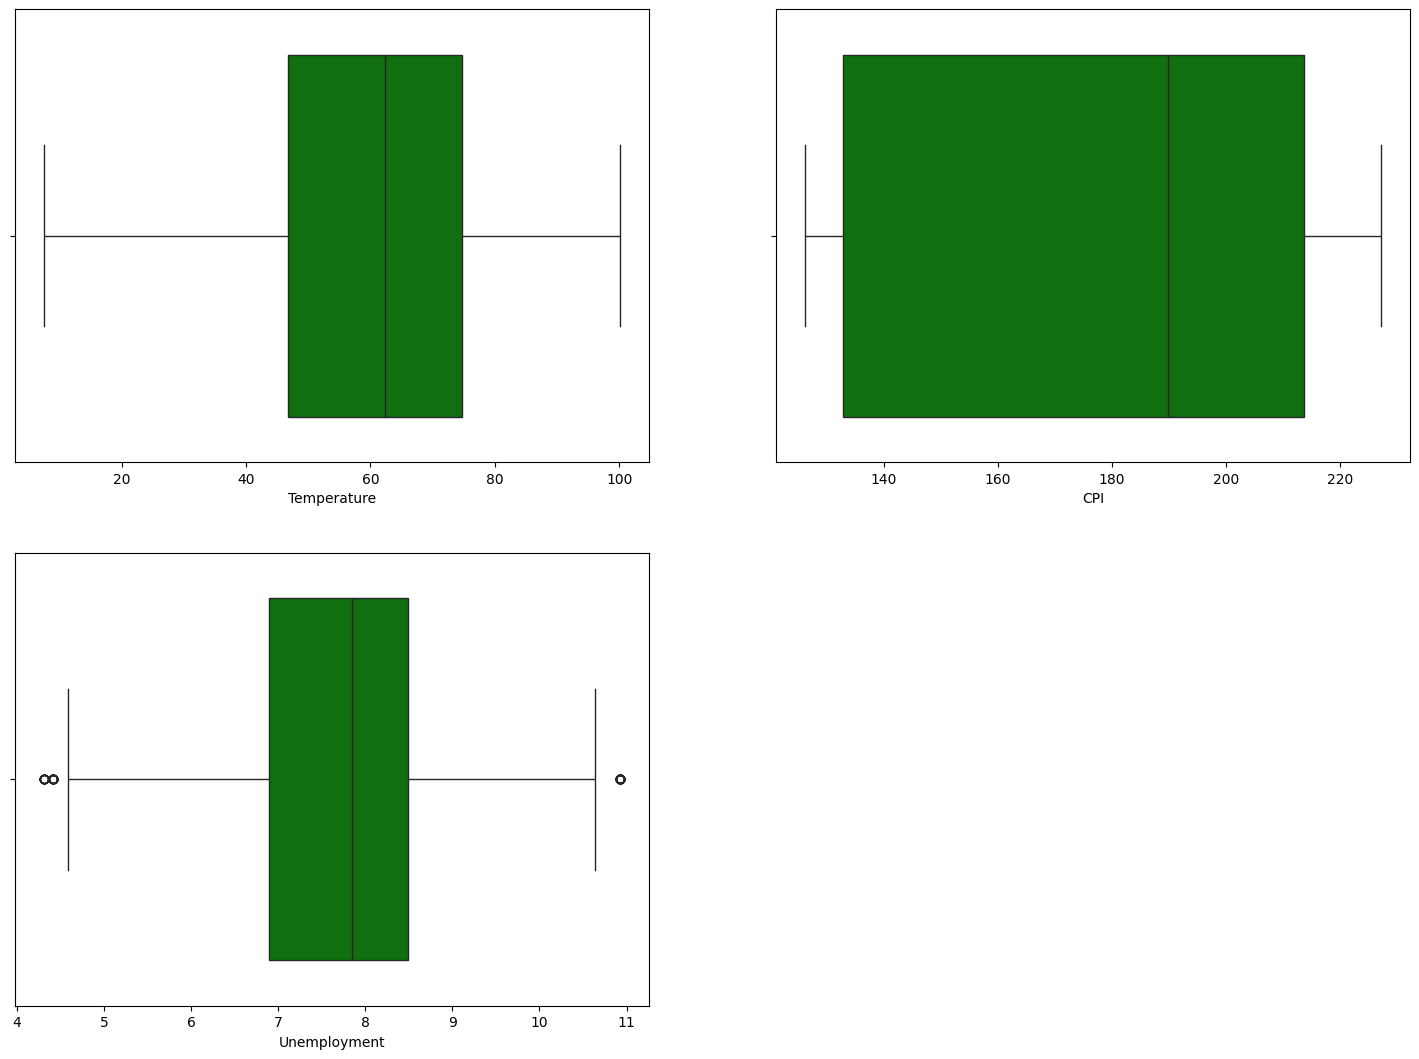

In [14]:
plt.figure(figsize = (18, 20))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data = df1, x = col,color = 'green') # Applied Square Root Rule for bins count
plt.show()

In [13]:
df1.drop(df1[df1['Unemployment']<4.5].index, axis = 0, inplace = True)
df1.drop(df1[df1['Unemployment']>10.8].index, axis = 0, inplace = True)

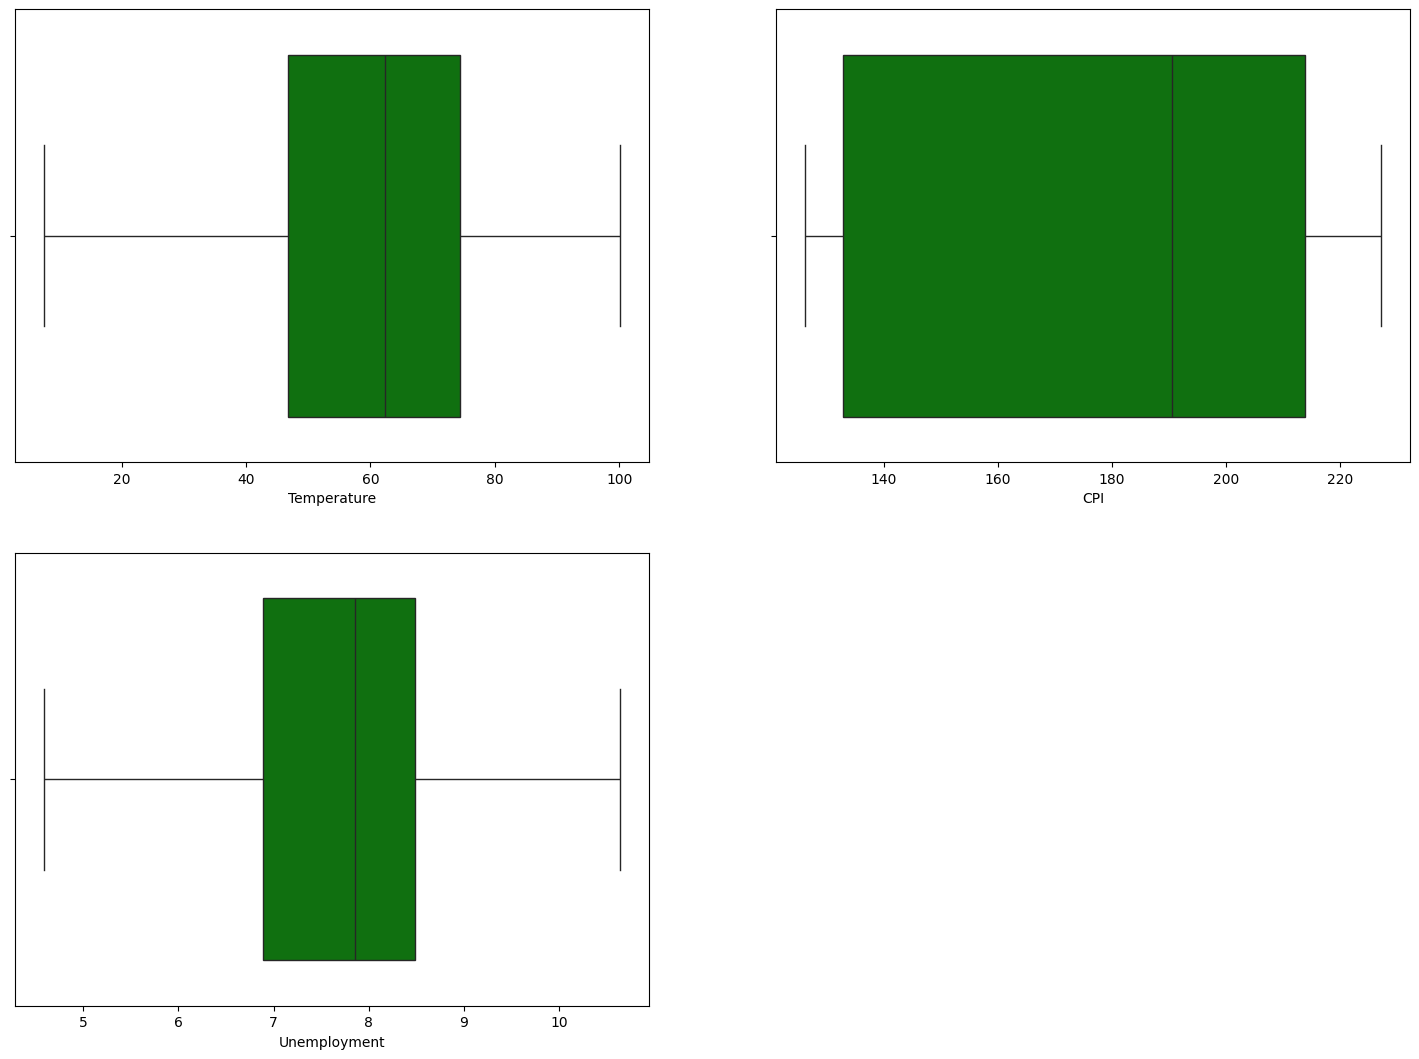

In [16]:
plt.figure(figsize = (18, 20))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data = df1, x = col,color = 'green') # Applied Square Root Rule for bins count
plt.show()

In [14]:
final_data=df1.copy()

In [15]:
final_data.shape

(5873, 9)

## 5. Data Modelling 

In [16]:
X=final_data.drop('Weekly_Sales',axis=1)
y=final_data['Weekly_Sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=24)

In [20]:
X

,Store,Holiday_Flag,Temperature,CPI,Unemployment,weekday,month,month_name
0,1,0,42.31,211.096358,8.106,4,2,February
1,1,1,38.51,211.242170,8.106,4,2,February
2,1,0,39.93,211.289143,8.106,4,2,February
3,1,0,46.63,211.319643,8.106,4,2,February
4,1,0,46.50,211.350143,8.106,4,3,March
...,...,...,...,...,...,...,...,...
5946,45,0,64.88,192.013558,8.684,4,9,September
5947,45,0,64.89,192.170412,8.667,4,10,October
5948,45,0,54.47,192.327265,8.667,4,10,October
5949,45,0,56.47,192.330854,8.667,4,10,October


In [21]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
5946     713173.95
5947     733455.07
5948     734464.36
5949     718125.53
5950     760281.43
Name: Weekly_Sales, Length: 5873, dtype: float64

In [17]:
num_features = final_data.select_dtypes('number').columns.to_list()
num_features.remove('Weekly_Sales')
cat_features = final_data.select_dtypes('object').columns.to_list()

In [23]:
num_features

['Temperature', 'CPI', 'Unemployment']

In [24]:
cat_features

['Store', 'Holiday_Flag', 'weekday', 'month', 'month_name']

In [18]:
preprocessor = ColumnTransformer([
    ('num_features', StandardScaler(), num_features),
    ('cat_features', BinaryEncoder(), cat_features),
])
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num_features', StandardScaler(),
                                 ['Temperature', 'CPI', 'Unemployment']),
                                ('cat_features', BinaryEncoder(),
                                 ['Store', 'Holiday_Flag', 'weekday', 'month',
                                  'month_name'])])

In [19]:
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [20]:
def model_evaluation(estimator, Training_Testing, X, y):
    predict_data = estimator.predict(X)
    
    print(f'{Training_Testing} Accuracy: \n')
    print(f'-> RMSE : {round(np.sqrt(mean_squared_error(y,predict_data)), 2)}')
    print(f'-> R-Squared : {round(r2_score(y,predict_data)*100, 2)}% \n')

In [21]:
def distribution_plot(estimator, Training_Testing, X, y, Title):
    yhat = estimator.predict(X)
    
    plt.figure(figsize = (14, 6))
    ax1 = sns.kdeplot(y, color = 'b', label = f'Actual Values({Training_Testing})',linewidth=2)
    ax2 = sns.kdeplot(yhat, color = 'r', label = f'Predicted Values({Training_Testing})', linewidth=2,ax = ax1)
    plt.title(Title)
    plt.legend()
    plt.show()

In [22]:
def cross_validation_score(estimator, X_train, y_train, score = 'r2', n = 5):
    validate = cross_val_score(estimator, X_train, y_train, scoring = score, cv = n)

    print(f'Cross validation scores: {validate}\n')
    print(f'Mean of scores: {round(validate.mean()*100, 2)}% \n')
    print(f'Standard Deviation: {validate.std()}')

In [23]:
def hyperparameter_tuning(estimator, X_train, y_train, param_grid, score = 'r2', n = 5):
    
    # grid search
    grid_search = GridSearchCV(estimator = estimator,
                              param_grid = param_grid,
                              scoring = score,
                              cv = n)
    # fiting the data
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f'Best Parameters: {best_params}\n')
    print(f'Best Score: {best_score}\n')
    best_estimator = grid_search.best_estimator_
    
    return best_estimator

In [24]:
LR = LinearRegression()
LR.fit(X_train_transformed, y_train)

LinearRegression()

In [25]:
LR = LinearRegression()
LR.fit(X_test_transformed, y_test)

LinearRegression()

In [38]:
model_evaluation(LR, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> RMSE : 538750.48
-> R-Squared : 14.38% 



In [27]:
model_evaluation(LR, 'Testing', X_test_transformed, y_test)

Testing Accuracy: 

-> RMSE : 530422.88
-> R-Squared : 13.08% 



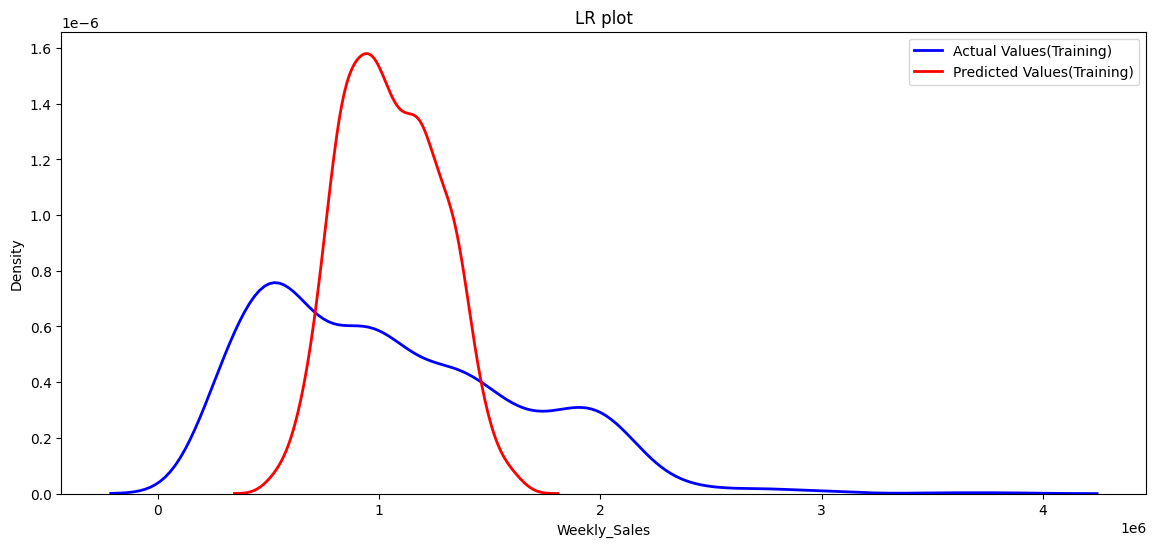

In [39]:
Title = 'LR plot'
distribution_plot(LR, 'Training', X_train_transformed, y_train, Title)

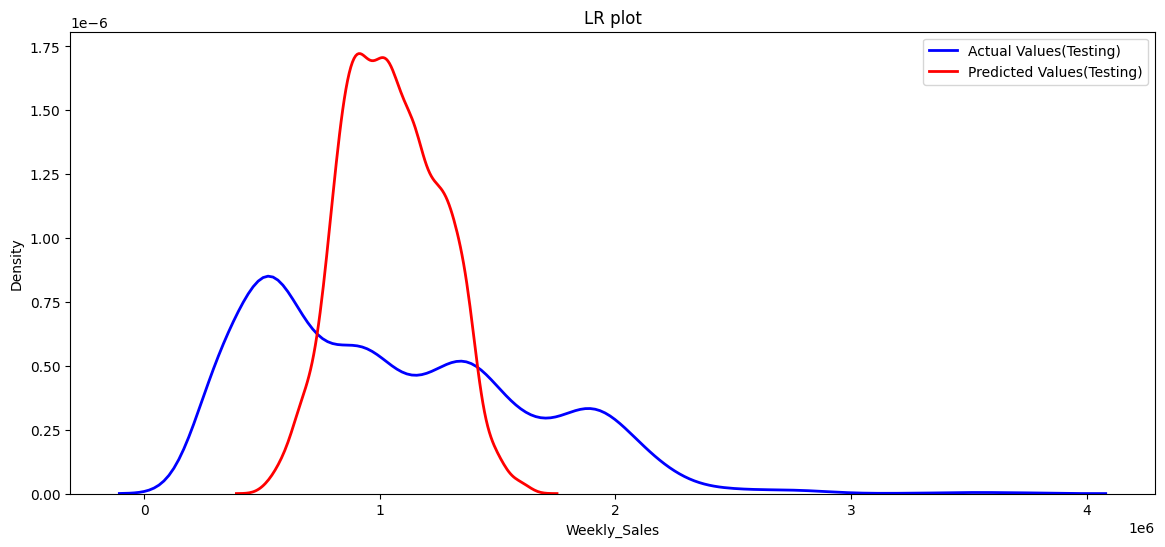

In [28]:
Title = 'LR plot'
distribution_plot(LR, 'Testing', X_test_transformed, y_test, Title)

In [35]:
LR_pipe = Pipeline([('poly_feat', PolynomialFeatures()),
                    ('lin_reg', LinearRegression())
                   ])
param_grid = {'poly_feat__degree': [2,3,4]}

best_estimator = hyperparameter_tuning(LR_pipe, X_train_transformed, y_train, param_grid, score = 'r2', n = 5)

Best Parameters: {'poly_feat__degree': 2}

Best Score: 0.7645601601989539



In [29]:
LR_pipe = Pipeline([('poly_feat', PolynomialFeatures()),
                    ('lin_reg', LinearRegression())
                   ])
param_grid = {'poly_feat__degree': [2,3,4]}

best_estimator = hyperparameter_tuning(LR_pipe, X_test_transformed, y_test, param_grid, score = 'r2', n = 5)

Best Parameters: {'poly_feat__degree': 3}

Best Score: 0.952574720197911



In [36]:
poly_reg = best_estimator
model_evaluation(poly_reg, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> RMSE : 248654.9
-> R-Squared : 81.76% 



In [31]:
poly_reg = best_estimator
model_evaluation(poly_reg, 'Testing', X_test_transformed, y_test)

Testing Accuracy: 

-> RMSE : 104669.04
-> R-Squared : 96.62% 



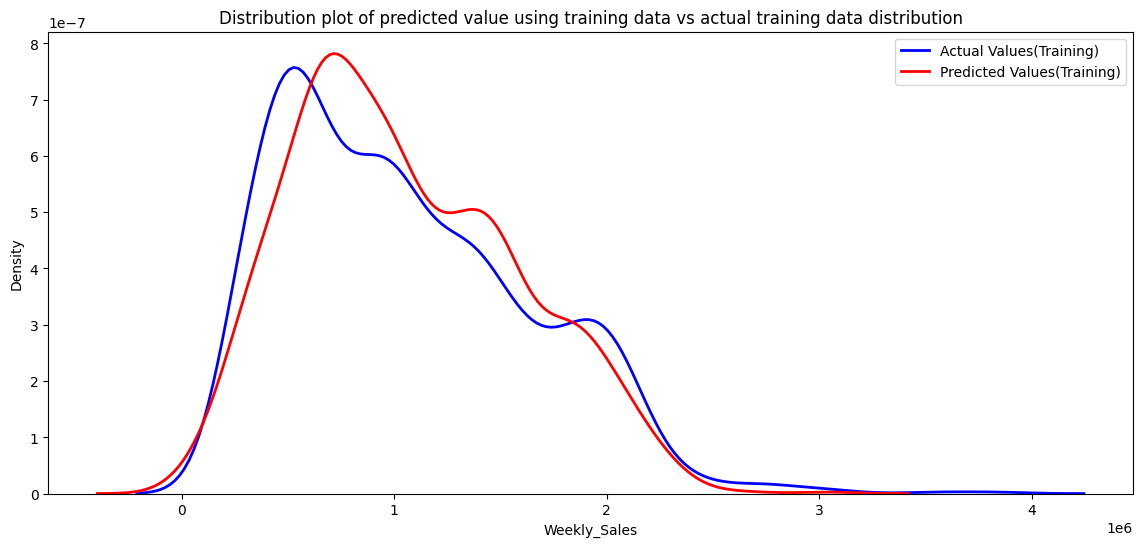

In [39]:
Title = 'Distribution plot of predicted value using training data vs actual training data distribution'
distribution_plot(poly_reg, 'Training', X_train_transformed, y_train, Title)

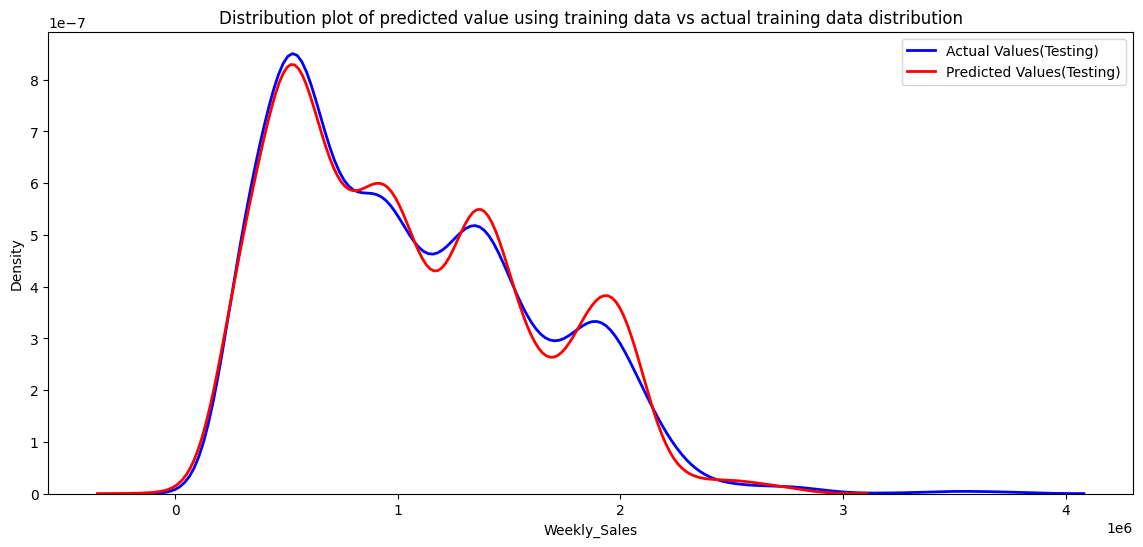

In [32]:
Title = 'Distribution plot of predicted value using training data vs actual training data distribution'
distribution_plot(poly_reg, 'Testing', X_test_transformed, y_test, Title)

In [34]:
cross_validation_score(poly_reg, X_test_transformed, y_test)
model_evaluation(poly_reg, 'Testing', X_test_transformed, y_test)

Cross validation scores: [0.94771952 0.96024941 0.95754079 0.94603011 0.95133377]

Mean of scores: 95.26% 

Standard Deviation: 0.00550468042494806
Testing Accuracy: 

-> RMSE : 104669.04
-> R-Squared : 96.62% 

